In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./dataset/exercise2.csv")

In [63]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [64]:
df.shape

(10886, 12)

In [65]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='count', ylabel='Count'>

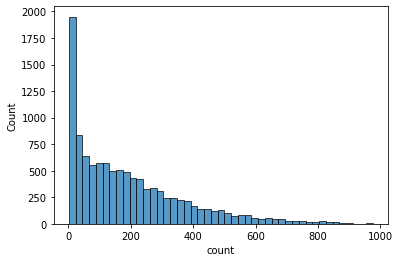

In [66]:
sns.histplot(data=df, x='count')

In [67]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

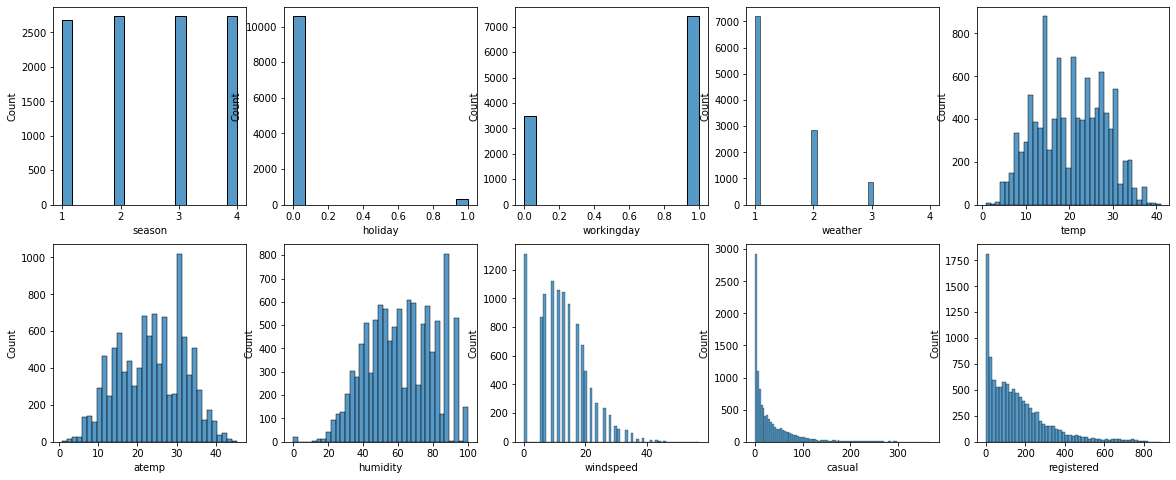

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20,8)

col_num = 1
for i in range(0,2):
    for j in range(0,5):
        sns.histplot(data=df, x=df.columns[col_num], ax=axs[i][j])
        col_num += 1

In [69]:
df2 = df.drop('datetime', axis=1)

<Axes: >

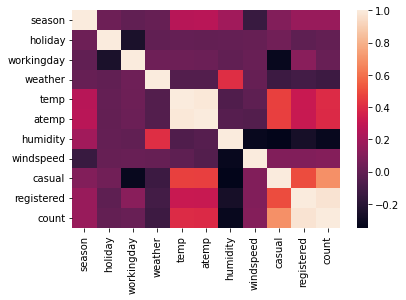

In [70]:
df2.corr()
sns.heatmap(df2.corr())

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [72]:
Y = df['count']
X = df.drop(['datetime', 'count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Ir_model = LinearRegression()
Ir_model.fit(X_train, y_train)
y_pred = Ir_model.predict(X_test)
mean_squared_log_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)

4.395326025655613e-26

<Axes: >

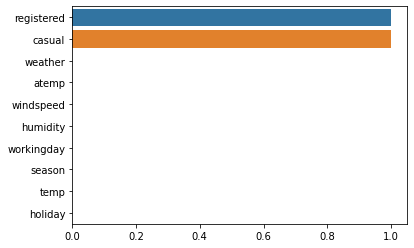

In [73]:
coef = pd.Series(Ir_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y = df['count']
X = df.drop(['datetime', 'count', 'registered', 'casual'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Ir_model = LinearRegression()
Ir_model.fit(X_train, y_train)
y_pred = Ir_model.predict(X_test)

mean_squared_error(y_test, y_pred)

24002.848082569948

In [77]:
df['datetime'] = df['datetime'].astype('datetime64')
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [78]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [80]:
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


<Axes: xlabel='count', ylabel='Count'>

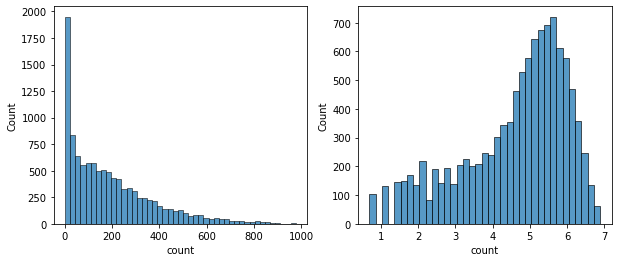

In [115]:
y_log = np.log1p(Y)

fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 4)
sns.histplot(x=Y, ax=axs[0])
sns.histplot(x=y_log, ax=axs[1])

In [ ]:
df = pd.get_dummies(df, columns=['year', 'month', 'day', 'hour', 'holiday',
                                    'workingday', 'season', 'weather'])

In [122]:
df

,temp,atemp,humidity,windspeed,count,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,16,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,40,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,32,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,13,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,336,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,241,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,168,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,129,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [126]:
df.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [127]:
Y = y_log
X = df.drop(['count'], axis=1, inplace=False)

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [134]:
X

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [133]:
scaled_X

array([[-1.33366069, -1.09273697,  0.99321305, ..., -0.59326406,
        -0.29269215, -0.00958486],
       [-1.43890721, -1.18242083,  0.94124921, ..., -0.59326406,
        -0.29269215, -0.00958486],
       [-1.43890721, -1.18242083,  0.94124921, ..., -0.59326406,
        -0.29269215, -0.00958486],
       ...,
       [-0.80742813, -0.91395927, -0.04606385, ..., -0.59326406,
        -0.29269215, -0.00958486],
       [-0.80742813, -0.73518157, -0.04606385, ..., -0.59326406,
        -0.29269215, -0.00958486],
       [-0.91267464, -0.82486544,  0.21375537, ..., -0.59326406,
        -0.29269215, -0.00958486]])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.3, random_state=42)

In [140]:
Ir_model = LinearRegression()
Ir_model.fit(X_train, y_train)
y_pred = Ir_model.predict(X_test)
mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))

0.34257682905304243

In [148]:
coef = pd.Series(Ir_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
coef_sort.head(10)

holiday_0       4.754274e+12
holiday_1       4.754274e+12
workingday_0    4.578511e+12
workingday_1    4.578511e+12
season_4        2.389238e+12
season_1        2.190105e+12
season_2        1.344365e+12
season_3        4.191307e+11
month_8         2.176813e+11
month_7         2.176813e+11
dtype: float64